# Itility - Analyst Testcase - Serverdata v2.0

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the data
First we import the data using Pandas function to read Excel files.

In [3]:
server_data = pd.DataFrame()
server_data = pd.read_excel('Analyst Testcase_Serverdata v2.0 020415.xlsx', 
                            'Server Data',
                            index_col = None,
                            na_values = ['NA'])
print server_data.head()

   Timestamp    Servername                Metric Unit      Average        Max  \
0 2014-09-22  ITLT_C1_S001    mem.active.average   KB  190856.3838  611107.65   
1 2014-09-22  ITLT_C1_S001  cpu.usagemhz.average  MHz      46.8072     303.60   
2 2014-09-23  ITLT_C1_S001    mem.active.average   KB  179302.9824  661132.24   
3 2014-09-23  ITLT_C1_S001  cpu.usagemhz.average  MHz      50.0955     300.84   
4 2014-09-24  ITLT_C1_S001    mem.active.average   KB  208730.8190  786261.83   

        Min  MemoryMB  NumCpu  CpuMHz  Cluster  
0  41101.20      4096       2    5320        1  
1     25.25      4096       2    5320        1  
2  62408.58      4096       2    5320        1  
3     23.04      4096       2    5320        1  
4  54718.75      4096       2    5320        1  


### First analysis

In [4]:
print server_data.describe()
start = min(server_data['Timestamp'])
end = max(server_data['Timestamp'])
diff = end - start
print 'Measured between %s and %s (%s days)' % (start.strftime('%Y-%m-%d'),
                                                end.strftime('%Y-%m-%d'),
                                                diff.days + 1)
print 'Number of servers is %d' % len(server_data.groupby('Servername'))
print 'Number of clusters is %d' % len(server_data.groupby('Cluster'))

            Average           Max           Min       MemoryMB         NumCpu  \
count  1.162860e+05  1.162860e+05  1.162860e+05  116286.000000  116286.000000   
mean   4.332553e+05  1.787918e+06  1.898774e+05   11611.071840       2.721807   
std    7.181352e+05  2.736286e+07  4.052957e+05    8777.435425       1.400061   
min    0.000000e+00  0.000000e+00  0.000000e+00    2048.000000       1.000000   
25%    1.824897e+02  1.054440e+03  3.052000e+01    4096.000000       2.000000   
50%    1.597401e+04  4.078988e+04  2.829400e+02    8192.000000       2.000000   
75%    6.888610e+05  2.231535e+06  2.214585e+05   16384.000000       4.000000   
max    1.111794e+07  9.271316e+09  1.139870e+07   40960.000000       8.000000   

              CpuMHz        Cluster  
count  116286.000000  116286.000000  
mean     6400.469188       3.382196  
std      3347.323978       1.286715  
min      2000.000000       1.000000  
25%      4800.000000       3.000000  
50%      4800.000000       3.000000  
75% 

## Slicing the data
We need to slice the DataFrame, since it contains memory and CPU data on different rows.

### Retrieve the memory data

In [5]:
mem_data = pd.DataFrame()
mem_data = server_data.loc[server_data['Metric'] == 'mem.active.average']
print mem_data.describe()

            Average           Max           Min      MemoryMB        NumCpu  \
count  5.814300e+04  5.814300e+04  5.814300e+04  58143.000000  58143.000000   
mean   8.660496e+05  3.573797e+06  3.795001e+05  11611.071840      2.721807   
std    8.104414e+05  3.861459e+07  5.065735e+05   8777.473166      1.400067   
min    0.000000e+00  0.000000e+00  0.000000e+00   2048.000000      1.000000   
25%    2.890374e+05  9.966694e+05  2.879983e+04   4096.000000      2.000000   
50%    6.888673e+05  2.231536e+06  2.214585e+05   8192.000000      2.000000   
75%    1.148850e+06  3.835241e+06  5.480531e+05  16384.000000      4.000000   
max    1.111794e+07  9.271316e+09  1.139870e+07  40960.000000      8.000000   

             CpuMHz       Cluster  
count  58143.000000  58143.000000  
mean    6400.469188      3.382196  
std     3347.338371      1.286721  
min     2000.000000      1.000000  
25%     4800.000000      3.000000  
50%     4800.000000      3.000000  
75%     9600.000000      4.000000  


### Retrieve the CPU data

In [6]:
cpu_data = pd.DataFrame()
cpu_data = server_data.loc[server_data['Metric'] == 'cpu.usagemhz.average']
print cpu_data.describe()

           Average           Max           Min      MemoryMB        NumCpu  \
count  58143.00000  58143.000000  58143.000000  58143.000000  58143.000000   
mean     460.93169   2038.818646    254.759717  11611.071840      2.721807   
std     1289.17880   3748.750214    774.244759   8777.473166      1.400067   
min        1.62900      1.840000      0.900000   2048.000000      1.000000   
25%       54.75540    315.605000     26.160000   4096.000000      2.000000   
50%      183.04000   1058.270000     90.300000   8192.000000      2.000000   
75%      413.23005   2198.700000    237.875000  16384.000000      4.000000   
max    48931.42960  67736.960000  50418.400000  40960.000000      8.000000   

             CpuMHz       Cluster  
count  58143.000000  58143.000000  
mean    6400.469188      3.382196  
std     3347.338371      1.286721  
min     2000.000000      1.000000  
25%     4800.000000      3.000000  
50%     4800.000000      3.000000  
75%     9600.000000      4.000000  
max    19

### Merge the rows for CPU and memory
The CPU and memory loggings are divided in two lines. We only need the Average, Max and Min of the memory row and insert it into the CPU row. This way there are no redundant rows and each row has full information on CPU and memory.

In [7]:
cpu_cols = ['Timestamp', 'Servername', 'Average', 'Max', 'Min', 'MemoryMB', 'NumCpu', 'CpuMHz', 'Cluster']
mem_cols = ['Timestamp', 'Servername', 'Average', 'Max', 'Min']
server_data = pd.merge(cpu_data[cpu_cols],
                       mem_data[mem_cols],
                       on=['Timestamp', 'Servername'],
                       how='inner',
                       suffixes=('_cpu', '_mem'))

### Show the columns of the data

In [8]:
print server_data.head()

   Timestamp    Servername  Average_cpu  Max_cpu  Min_cpu  MemoryMB  NumCpu  \
0 2014-09-22  ITLT_C1_S001      46.8072   303.60    25.25      4096       2   
1 2014-09-23  ITLT_C1_S001      50.0955   300.84    23.04      4096       2   
2 2014-09-24  ITLT_C1_S001      45.6967   350.86    26.16      4096       2   
3 2014-09-25  ITLT_C1_S001      50.6412   339.36    22.50      4096       2   
4 2014-09-26  ITLT_C1_S001      47.6805   455.40    25.30      4096       2   

   CpuMHz  Cluster  Average_mem    Max_mem   Min_mem  
0    5320        1  190856.3838  611107.65  41101.20  
1    5320        1  179302.9824  661132.24  62408.58  
2    5320        1  208730.8190  786261.83  54718.75  
3    5320        1  180816.3721  894138.30  46805.04  
4    5320        1  190580.0035  910945.49  42778.80  


### Example of the data

       Average_cpu     Max_cpu    Min_cpu  MemoryMB  NumCpu  CpuMHz  Cluster  \
count    61.000000   61.000000  61.000000      61.0    61.0    61.0     61.0   
mean     47.077380  380.306393  22.219836    4096.0     2.0  5320.0      1.0   
std       6.212575  153.489274   4.650210       0.0     0.0     0.0      0.0   
min      23.040000   24.480000   0.920000    4096.0     2.0  5320.0      1.0   
25%      44.754500  310.500000  20.930000    4096.0     2.0  5320.0      1.0   
50%      47.960000  355.350000  22.440000    4096.0     2.0  5320.0      1.0   
75%      50.440000  425.320000  24.610000    4096.0     2.0  5320.0      1.0   
max      64.745700  780.000000  30.000000    4096.0     2.0  5320.0      1.0   

         Average_mem       Max_mem        Min_mem  
count      61.000000  6.100000e+01      61.000000  
mean   194676.097474  9.326388e+05   53334.612787  
std     19814.837173  5.175791e+05   42398.491987  
min    155840.106400  1.808000e+05    8639.640000  
25%    180263.31000

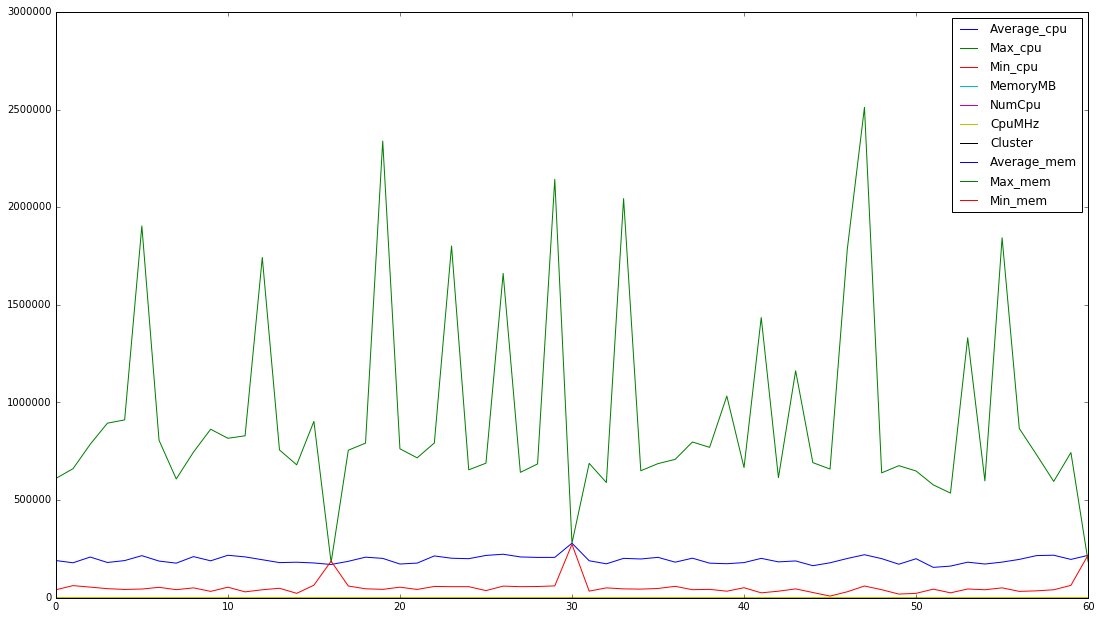

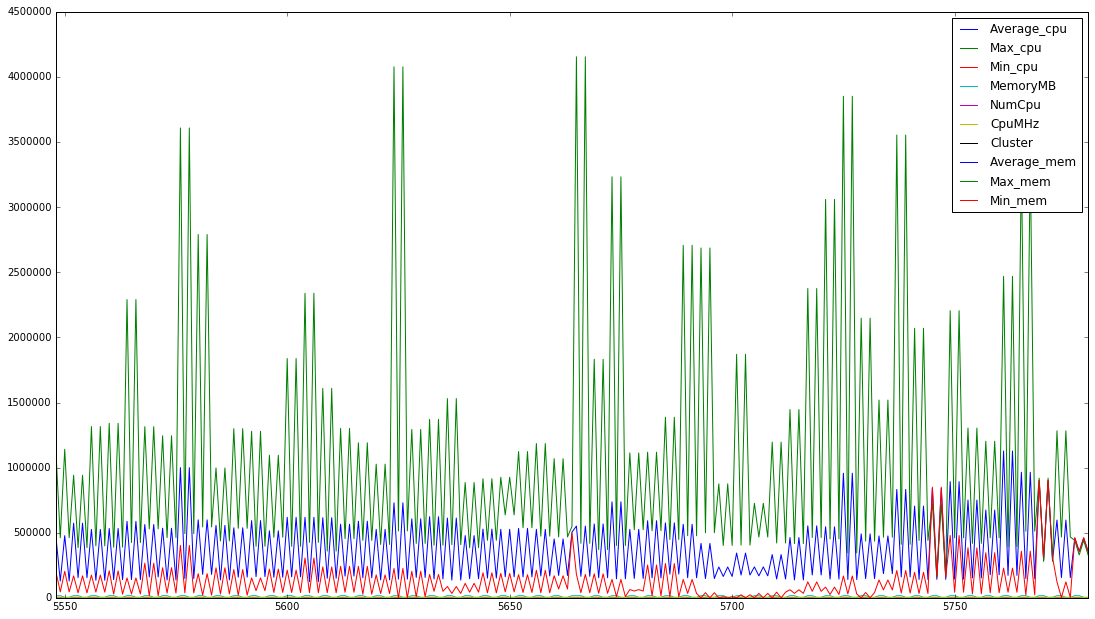

In [9]:
print server_data[server_data['Servername'] == 'ITLT_C1_S001'].describe()
print server_data[server_data['Servername'] == 'ITLT_C2_S134'].describe()

server_data[server_data['Servername'] == 'ITLT_C1_S001'].plot()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

server_data[server_data['Servername'] == 'ITLT_C2_S134'].plot()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

### Number of servers
Check how many servers are running per day. Order by day, next by server and count the unique occurrences.

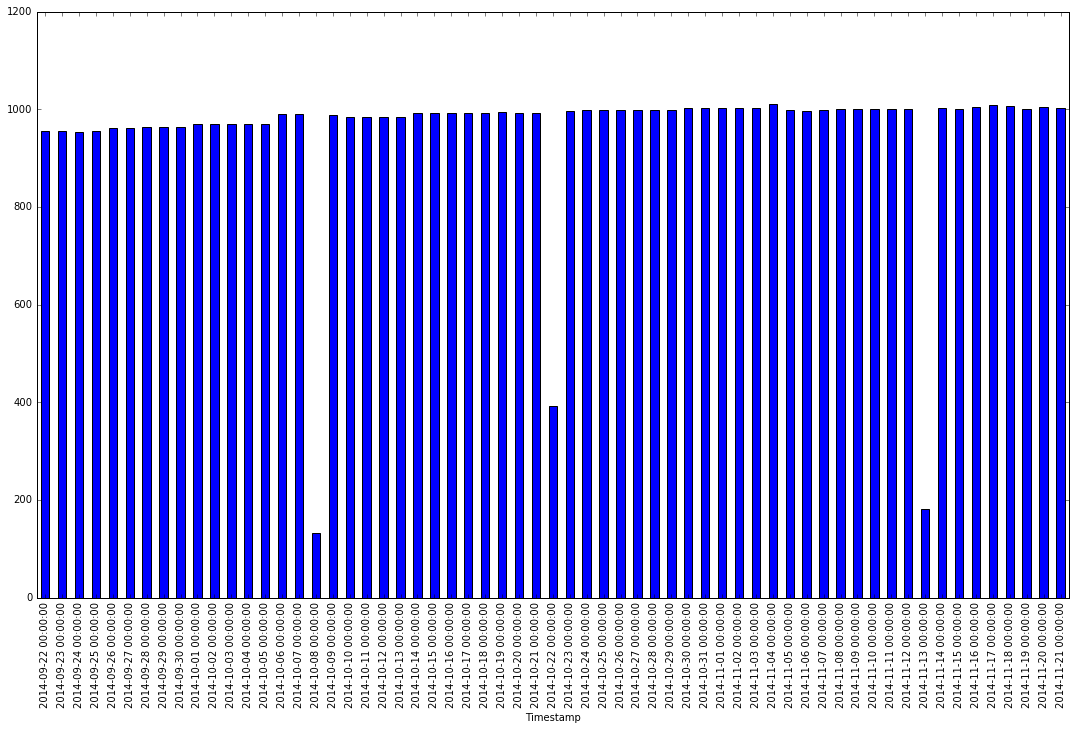

In [10]:
server_data.groupby('Timestamp')['Servername'].nunique().plot.bar()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

As can be seen in the graph, on three days the number of servers was significantly lower.

In [11]:
mean_num_servers = server_data.groupby('Timestamp')['Servername'].nunique().mean()
std_num_servers = server_data.groupby('Timestamp')['Servername'].nunique().std()

for day, df in server_data.groupby('Timestamp'):
    if df['Servername'].nunique() < mean_num_servers - std_num_servers:
        print "On %s there was a lower number of servers" % day.strftime("%Y-%m-%d")

On 2014-10-08 there was a lower number of servers
On 2014-10-22 there was a lower number of servers
On 2014-11-13 there was a lower number of servers


### Cluster usage
Below we verify if all clusters are evenly used throughout time. First we order by cluster, next by timestamp and count the unique servers that are running.

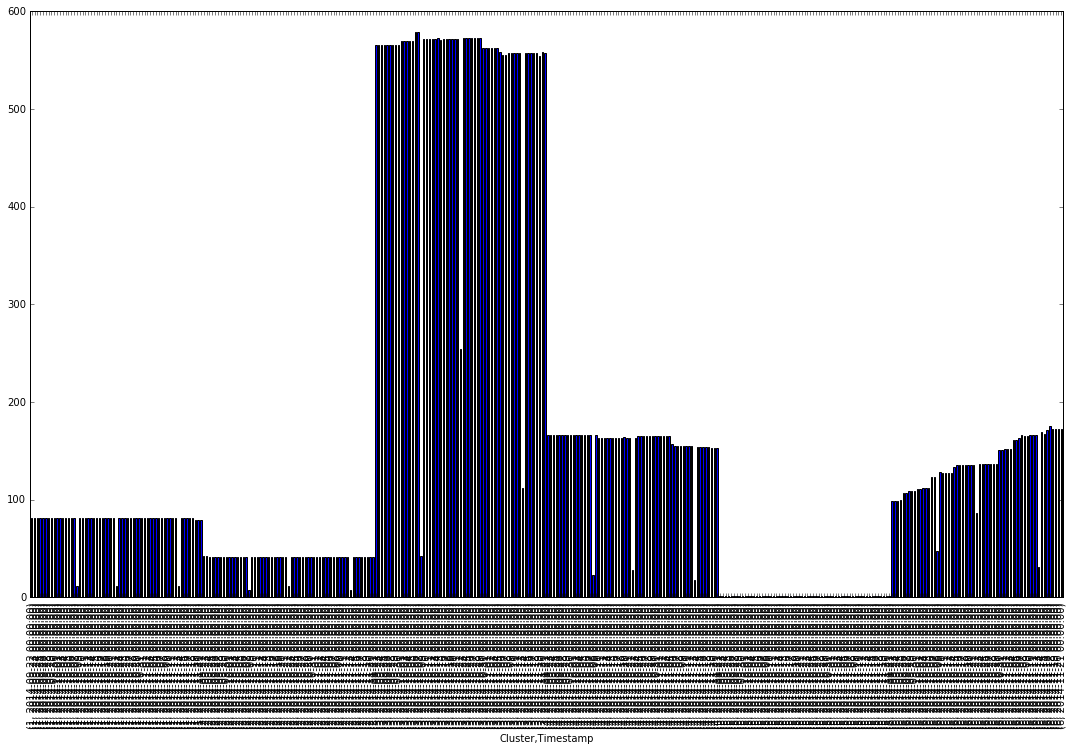

In [12]:
server_data.groupby(['Cluster', 'Timestamp'])['Servername'].nunique().plot.bar()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

We can see that all clusters are static over time. The three bad days are clearly visible. Cluster 5 is barely used, it only contains one server. To the 6th cluster some servers were added during the two months, while some were removed from cluster 3 and 4.

### Found outliers in the memory usage column

In [42]:
av_mem_mean = server_data['Average_mem'].mean()
av_mem_std = server_data['Average_mem'].std()
server_data[np.abs(server_data['Average_mem'] - av_mem_mean) > 10*av_mem_std]

,Timestamp,Servername,Average_cpu,Max_cpu,Min_cpu,MemoryMB,NumCpu,CpuMHz,Cluster,Average_mem,Max_mem,Min_mem
36379,2014-10-20,ITLT_C3_X478,2287.5316,5345.58,818.68,32256,6,14400,3,9.002832e+06,25660455.48,1569589.56
36386,2014-10-27,ITLT_C3_X478,2104.5900,5471.77,689.07,32256,6,14400,3,1.041230e+07,24349819.79,1767109.28
36408,2014-11-19,ITLT_C3_X478,1551.3300,1661.02,1645.35,32256,6,14400,3,9.790133e+06,10408457.03,10099294.94
44316,2014-11-12,ITLT_C4_X631,5504.6400,5797.44,6031.68,32256,6,14400,4,1.111794e+07,10814727.54,9096499.80
44324,2014-11-21,ITLT_C4_X631,5935.6000,6185.52,5623.20,32256,6,14400,4,1.031311e+07,11941495.50,11398700.25
44934,2014-10-23,ITLT_C4_X642,16347.2400,35098.48,14652.00,32256,6,14400,4,9.248148e+06,17017127.76,5275792.17
44935,2014-10-24,ITLT_C4_X642,17715.2256,35076.20,17140.08,32256,6,14400,4,9.473297e+06,16992464.32,6801564.64
44960,2014-11-19,ITLT_C4_X642,20229.6604,24149.76,14028.12,32256,6,14400,4,1.040225e+07,14533260.50,7960922.53
44992,2014-10-23,ITLT_C4_X643,17526.5272,37676.64,15582.08,32256,6,14400,4,9.990459e+06,20946173.41,8283957.66
44993,2014-10-24,ITLT_C4_X643,18931.8912,25393.92,16564.20,32256,6,14400,4,1.093434e+07,22127550.88,7719142.35


### Find the low memory servers

In [46]:
av_mem_mean = server_data['Average_mem'].mean()
av_mem_std = server_data['Average_mem'].std()
server_data[(server_data['Average_mem'] - av_mem_mean) < 10*av_mem_std]

,Timestamp,Servername,Average_cpu,Max_cpu,Min_cpu,MemoryMB,NumCpu,CpuMHz,Cluster,Average_mem,Max_mem,Min_mem
0,2014-09-22,ITLT_C1_S001,46.8072,303.60,25.25,4096,2,5320,1,1.908564e+05,611107.65,41101.20
1,2014-09-23,ITLT_C1_S001,50.0955,300.84,23.04,4096,2,5320,1,1.793030e+05,661132.24,62408.58
2,2014-09-24,ITLT_C1_S001,45.6967,350.86,26.16,4096,2,5320,1,2.087308e+05,786261.83,54718.75
3,2014-09-25,ITLT_C1_S001,50.6412,339.36,22.50,4096,2,5320,1,1.808164e+05,894138.30,46805.04
4,2014-09-26,ITLT_C1_S001,47.6805,455.40,25.30,4096,2,5320,1,1.905800e+05,910945.49,42778.80
5,2014-09-27,ITLT_C1_S001,54.7785,780.00,24.24,4096,2,5320,1,2.158332e+05,1904044.04,44875.80
6,2014-09-28,ITLT_C1_S001,51.8430,350.48,26.75,4096,2,5320,1,1.880975e+05,806310.72,53684.16
7,2014-09-29,ITLT_C1_S001,46.2884,434.42,27.50,4096,2,5320,1,1.774647e+05,608507.37,41604.48
8,2014-09-30,ITLT_C1_S001,51.9718,266.22,24.00,4096,2,5320,1,2.108337e+05,745940.42,50859.24
9,2014-10-01,ITLT_C1_S001,46.9953,355.00,27.00,4096,2,5320,1,1.894019e+05,863184.00,32880.96
